[학습목표]<br>
seaborn으로 막대그래프를 그릴 수 있다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 샘플데이터

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# 요일별 팁 평균

## matplotlib으로 시각화

### 데이터 가공
* 요일별 팁 평균 계산
* 그룹핑 : 데이터프레임.groupby(그룹기준컬럼)[통계적용컬럼].통계함수

In [6]:
day_tip_mean = tips.groupby('day')['tip'].mean()
day_tip_mean

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

### 데이터 시각화
* plt.bar(x,y)

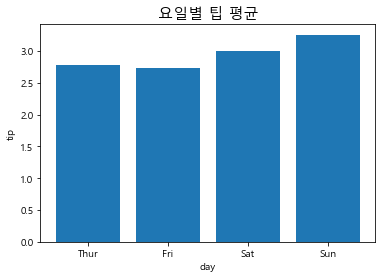

In [7]:
plt.bar(day_tip_mean.index, day_tip_mean)
plt.xlabel('day')
plt.ylabel('tip')
plt.title('요일별 팁 평균', size=15)
plt.show()

## seaborn으로 그리기
* <b>`sns.barplot(data=데이터프레임명, x=x축컬럼, y=y축컬럼)`</b>
* x축데이터로 그룹핑한 y축데이터의 평균값을 계산하여 그래프를 그려준다.
* 신뢰구간(CI:Confidence Interval)을 함께 표시<br>

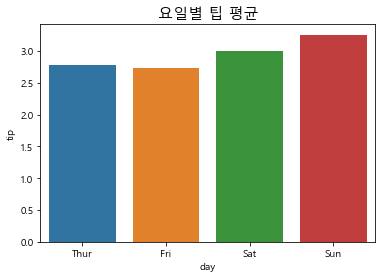

In [8]:
sns.barplot(data=tips, x='day', y='tip', ci=None)
plt.title('요일별 팁 평균', size=15)
plt.show()

# 요일별 팁 합계

## matplotlib으로 그리기

In [9]:
day_tip_sum = tips.groupby('day')['tip'].sum()
day_tip_sum

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

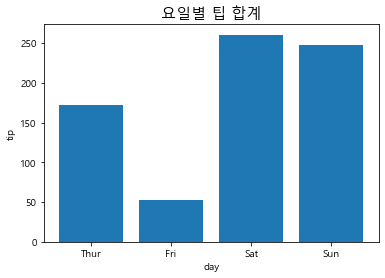

In [10]:
plt.bar(day_tip_sum.index, day_tip_sum)
plt.xlabel('day')
plt.ylabel('tip')
plt.title('요일별 팁 합계', size=15)
plt.show()

## seaborn으로 그리기
* estimator = 통계함수

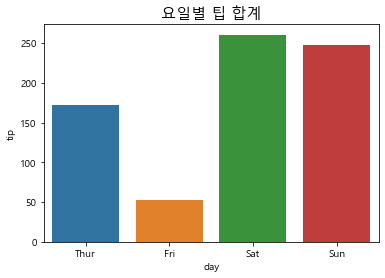

In [11]:
sns.barplot(data=tips, x='day', y='tip', ci=None, estimator=sum)
plt.title('요일별 팁 합계', size=15)
plt.show()

# 요일별 팁 합계를 흡연여부로 비교
* hue : y를 그룹핑할 컬럼

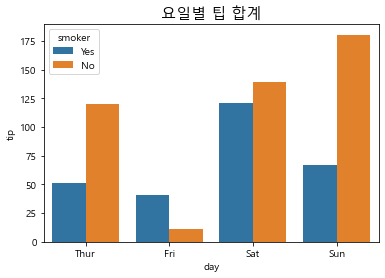

In [12]:
sns.barplot(data=tips, x='day', y='tip', ci=None, estimator=sum, hue='smoker')
plt.title('요일별 팁 합계', size=15)
plt.show()

* hue 색상 변경 : palette = 구분:색상 딕셔너리

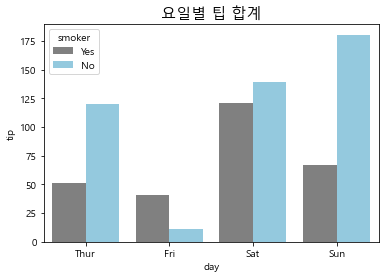

In [13]:
sns.barplot(data=tips, x='day', y='tip', ci=None, estimator=sum, hue='smoker'
           , palette ={'Yes':'gray', 'No':'skyblue'})
plt.title('요일별 팁 합계', size=15)
plt.show()

* pyplot의 메소드로 그리드 추가

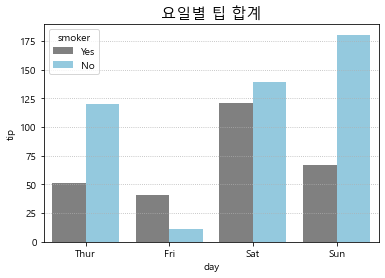

In [14]:
sns.barplot(data=tips, x='day', y='tip', ci=None, estimator=sum, hue='smoker'
           , palette ={'Yes':'gray', 'No':'skyblue'})
plt.title('요일별 팁 합계', size=15)
plt.grid(axis='y', ls=':')
plt.show()